In [1]:
library(tidyverse) # all tidyverse packages, including dplyr and ggplot2
library(ggpubr) # ggplot2 based plots
library(effects) # for linear modeling

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: carData

lattice theme set by effectsTheme()
See ?effectsTheme for details.



In [2]:
# Loading data
full.data <- read.csv("Module3_4/Module3_4_FullDemoChemData.csv")

NOT SURE IF I LIKE THE GLOBAL P VALUE THERE

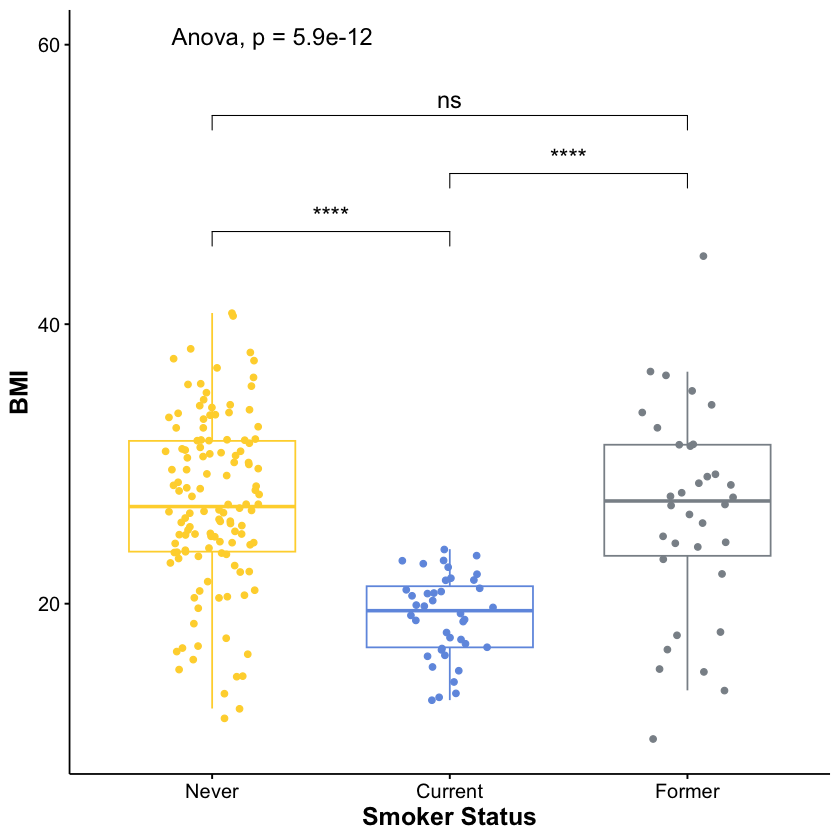

In [38]:
my_comparisons = list(c("Never", "Current"), c("Current", "Former"), c("Never", "Former"))

ggboxplot(data = full.data, x = "Smoker3", y = "BMI", add = "jitter", color = "Smoker3", palette = "simpsons",
         xlab = "Smoker Status", font.x = c(15, "bold"), font.y = c(15, "bold")) +  # Adjusting axes text
  rremove("legend") +  # Removing legend
  # Global p value
  stat_compare_means(method = "anova", label.y = 60, size = 5) + 
  # Add pairwise comparisons p-value from t tests
  stat_compare_means(comparisons = my_comparisons, label = "p.signif", # changes p values to asterisks
               method = "t.test", size = 5) 

symnum.args <- list(cutpoints = c(0, 0.0001, 0.001, 0.01, 0.05, Inf), symbols = c("****", "***", "**", "*", "ns")).

In other words, we use the following convention for symbols indicating statistical significance:

ns: p > 0.05

*: p <= 0.05

**: p <= 0.01

***: p <= 0.001

****: p <= 0.0001

In [16]:
# use this code for available methods
ggpubr:::.method_info

function (method) 
{
    if (is.null(method)) 
        method = "wilcox.test"
    allowed.methods <- list(t = "t.test", t.test = "t.test", 
        student = "t.test", wiloxon = "wilcox.test", wilcox = "wilcox.test", 
        wilcox.test = "wilcox.test", anova = "anova", aov = "anova", 
        kruskal = "kruskal.test", kruskal.test = "kruskal.test")
    method.names <- list(t.test = "T-test", wilcox.test = "Wilcoxon", 
        anova = "Anova", kruskal.test = "Kruskal-Wallis")
    if (!(method %in% names(allowed.methods))) 
        stop("Non-supported method specified. Allowed methods are one of: ", 
            .collapse(allowed.methods, sep = ", "))
    method <- allowed.methods[[method]]
    method.name <- method.names[[method]]
    list(method = method, name = method.name)
}
<bytecode: 0x7f9bc323d3c0>
<environment: namespace:ggpubr>